In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.io as pio
import plotly
from IPython.display import Image
import sys
#import phik
pio.renderers.default = 'svg'
#pio.orca.config.use_xvfb = True
#plotly.io.orca.config.executable = '/usr/local/bin/to/'
#plotly.io.orca.config.executable = '/Users/fast6/anaconda3/orca_ap'

In [2]:
import plotly.io as pio
pio.renderers.default = 'svg'

In [3]:
sales=pd.read_csv('y_df.csv')
sales.head()

,date,total_sales
0,2011-01-29,32631.0
1,2011-01-30,31749.0
2,2011-01-31,23783.0
3,2011-02-01,25412.0
4,2011-02-02,19146.0


In [4]:
calendar=pd.read_csv('calendar.csv')
calendar.head()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1


In [5]:
sales=sales.merge(calendar,
            left_on='date',
            right_on='date',
           #left_index=True,
           #right_index=True,
            validate='1:1') \
    .set_index('date')
sales.head()

,total_sales,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
date,,,,,,,,,,,,,,
2011-01-29,32631.0,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
2011-01-30,31749.0,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2011-01-31,23783.0,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
2011-02-01,25412.0,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
2011-02-02,19146.0,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1


In [6]:
sales.dtypes

total_sales     float64
wm_yr_wk          int64
weekday          object
wday              int64
month             int64
year              int64
d                object
event_name_1     object
event_type_1     object
event_name_2     object
event_type_2     object
snap_CA           int64
snap_TX           int64
snap_WI           int64
dtype: object

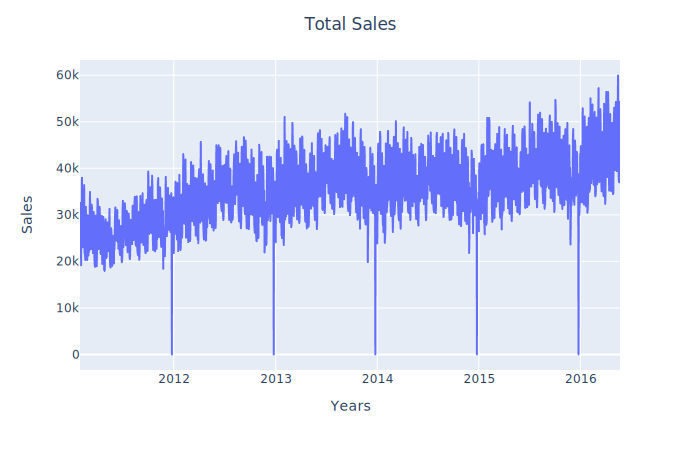

In [7]:
# https://plotly.com/python/time-series/
# https://stackoverflow.com/a/27277074

# Since the Sales CSV has data only for about 1941 days, we are picking the date for 1941 days from Cal CSV.
date = sales.index

# Before plotting the chart for total sales every day across all the states, we are creating a Data Frame making it convinent to plot
temp = pd.DataFrame({'Years':date, "Sales":sales.total_sales})

# Using plotly line plot to make it interactive
fig = px.line(data_frame=temp, x="Years", y="Sales")

# The tilte parameter sets the title for the chart and title_x = 0.5 brings it to center, the value ranges between 0 - 1.
fig.update_layout(title='Total Sales', title_x=0.5)
fig.show()
#fig.show("svg")

Observation:

There are 1941 days columns/features, which is around 5 years of data

Every Year on Christmas the sales greatly fall less than 50.

The demand is growing every year, not exponentially but smoothly.

In [273]:
# Filling the places of NaN values with No_Event
#sales.fillna('No_Event', inplace=True)

# Days contains the column names from d_1 to d_1941, we are picking only those columns from the sales csv
#c = sales[days]

# we are picking the features weekday and d from the cal csv till 1941 rows.
temp = sales[['weekday','d', 'total_sales']][:1942]


In [274]:
temp

,weekday,d,total_sales
date,,,
2011-01-29,Saturday,d_1,32631.0
2011-01-30,Sunday,d_2,31749.0
2011-01-31,Monday,d_3,23783.0
2011-02-01,Tuesday,d_4,25412.0
2011-02-02,Wednesday,d_5,19146.0
...,...,...,...
2016-05-18,Wednesday,d_1937,37096.0
2016-05-19,Thursday,d_1938,36963.0
2016-05-20,Friday,d_1939,42552.0


In [275]:
"""We are merging the dataframe c and d and setting the index to be d and grouping it by weekdays and summing it which gives the sale of every product each, 
we are again summing it up, this gives the sale of total products on a weekday and then sorting by it's increasing order."""

#temp = c.merge(d,left_index=True, right_on='d')
temp.set_index('d', inplace=True)
#temp = temp.groupby('weekday').sum().sum(axis=0).sort_values()
#temp = temp.groupby('weekday').sum(axis=1).sort_values()
#y = [str(np.round(i/temp.sum()*100, 2))+'%' for i in temp.values]

In [352]:
temp = temp.groupby('weekday').sum().sort_values(by='total_sales')

In [353]:
temp

,total_sales
weekday,
Wednesday,8346126.0
Thursday,8398928.0
Tuesday,8448634.0
Monday,9139596.0
Friday,9517020.0
Sunday,11482526.0
Saturday,11594343.0


In [354]:
temp.sum()

total_sales    66927173.0
dtype: float64

In [358]:
y=[(np.round(np.take(i,indices=0)/66927173*100,2)) for i in temp.values]
y

[12.47, 12.55, 12.62, 13.66, 14.22, 17.16, 17.32]

In [362]:

"""We are defining a variable colors for different colours, then plotting a bar graph"""

colors = ['a','b','c','d','e','f','g']
fig = px.bar(x=temp.index, y=y, labels={'x':"Days","y":'Percent Sales'},color=colors, text=y)
fig.update_traces(hovertemplate='Total Sales: %{y}', textposition='outside')
fig.update_layout(showlegend=False, title="Percent Sale on day basis", title_x=0.5,width=800, height=500)
fig.show()

Observation:

There's a huge number of sales happening during the weekends.
The sales rise and fall before and after weekends from Friday to Monday.

In [390]:
sales.fillna('No_Event', inplace=True)

In [391]:

temp = sales[['event_type_1','d', 'total_sales']]
temp.set_index('d', inplace=True)


In [392]:
temp = temp.groupby('event_type_1').mean().sort_values(by='total_sales')
temp

,total_sales
event_type_1,
National,29458.509804
Religious,34426.240741
No_Event,34609.336511
Cultural,34718.594595
Sporting,35796.062500


In [393]:
temp.sum()

total_sales    169008.744151
dtype: float64

In [394]:
#y=[(np.round(np.take(i,indices=0)/66927173*100,2)) for i in temp.values]
y = [(np.round(np.take(i,indices=0)/134399.4*100, 2)) for i in temp.values]
y

[21.92, 25.61, 25.75, 25.83, 26.63]

In [395]:

colors = ['a','b','c','d','e']
fig = px.bar(x=temp.index, y=y, labels={'x':"Events","y":'Percent Sales'},color=colors, text=y)
fig.update_traces(hovertemplate='Total Sales: %{y}', textposition='outside')
fig.update_layout(showlegend=False, title="Percent of Sales on event/no event days", title_x=0.5, width=800, height=500)
fig.show()


Observation:

The sales happened during sporting event times are slightly more than sales happened around no events and other events.
The sales happened on National event days are little lower, but we can conlude it's the cause of low sales.

In [403]:
"""We are creating a new feature No. of events in cal csv, by counting how many time 'No_Event' comes in a row.
If there are 4 No_Events in a row it means there were no events on that day, if there was 2 "No Events" on a row then it means there was 1 event on that day
and if there 0 "No_Events" on a row, then it means there were 2 events on that day."""

g = []
for i in np.sum(sales == 'No_Event', axis=1):
    if i == 0:
        g.append('Two')
    elif i == 2:
        g.append('One')
    else:
        g.append('Zero')

sales['No_of_events'] = g

In [404]:

"""Now we are grouping them, calculating the mean and then plotting them"""

#d = cal[['No_of_events','d']]
temp = sales[['No_of_events','d', 'total_sales']]
#temp.set_index('d', inplace=True)
temp = temp.groupby('No_of_events').mean().sort_values(by='total_sales')


In [405]:
temp.sum()

total_sales    104694.164434
dtype: float64

In [406]:
#y = [(np.round(np.take(i,indices=0)/134399.4*100, 2)) for i in temp.values]
y = [(np.round(np.take(i,indices=0)/104694.2*100, 2)) for i in temp.values]
y

[31.45, 33.06, 35.5]

In [407]:
colors = ['a','b','c']
fig = px.bar(x=temp.index, y=y, labels={'x':"No. of Events","y":'Percent Sales'},color=colors, text=y)
fig.update_traces(hovertemplate='Total Sales: %{y}', textposition='outside')
fig.update_layout(showlegend=False, title="Percent of sales w/ No. of Events", title_x=0.5, width=800, height=500)
fig.show()


Observation:

When there were 2 events on a day the sales happened are little high than days when there were no events.
But on the contrary, when there were 1 event, the sales happened were little less than days when there were no events.

In [444]:
# https://stackoverflow.com/a/28238656

# We are picking only the snap features from the cal csv and d for merging with sales csv
#d = cal[['snap_CA','snap_TX','snap_WI','d']]
temp = sales[['snap_CA','snap_TX','snap_WI','total_sales']]
#temp.set_index('d', inplace=True)

# We are then replacing 0s and 1s with No snap and Snap on all the 3 snap columns.
temp['snap_CA'] = temp['snap_CA'].apply(lambda x: "No Snap" if x==0 else "Snap")
temp['snap_TX'] = temp['snap_TX'].apply(lambda x: "No Snap" if x==0 else "Snap")
temp['snap_WI'] = temp['snap_WI'].apply(lambda x: "No Snap" if x==0 else "Snap")

# We are then creating a subplot with 1 row and 3 columns, and giving a title for each subplot.
fig = make_subplots(rows=1, cols=3, subplot_titles=('Average Sales on Snap VS Non-Snap days in CA', \
                                                    'Average Sales on Snap VS Non-Snap days in TX', \
                                                    'Average Sales on Snap VS Non-Snap days in WI'))

"""We are then grouping with snap feature for every state and taking it's mean to give avg. sale of every product for snap and no snap days, 
hence taking mean again to get the avg. sales on total during the snap and non-snap days. Then from the mean value we are computing it's percent of sales.
Then we are creating a bar plot and adding it to the fig for all the states."""

temp1 = temp.groupby('snap_CA').mean().mean(axis=1).sort_values()
y = [np.round(i/temp1.sum()*100, 2) for i in temp1.values]

# We are passing name parameter with empty string to remove hover which says the trance number.
fig.add_trace(go.Bar(x=temp1.index, y=y, text=y, name = "", marker=dict(color=[1,2])))

temp1 = temp.groupby('snap_TX').mean().mean(axis=1).sort_values()
y = [np.round(i/temp1.sum()*100, 2) for i in temp1.values]

fig.add_trace(go.Bar(x=temp1.index, y=y, text=y,name = "", marker=dict(color=['red', 'green'])), 1,2)

temp1 = temp.groupby('snap_WI').mean().mean(axis=1).sort_values()
y = [np.round(i/temp1.sum()*100, 2) for i in temp1.values]

fig.add_trace(go.Bar(x=temp1.index, y=y, text=y, name = "", marker=dict(color=['gold','silver'])),1,3)

fig.update_traces(hovertemplate='Total Sales: %{y}',textposition='outside')
fig.update_layout(showlegend=False, title_text="Sales comparison on Snap VS Non-Snap Days", title_x=0.5, width =1300)



<ipython-input-444-b5f4d349c27f>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-444-b5f4d349c27f>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-444-b5f4d349c27f>:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Observation:

Clearly the sales on all the states during the Snap days are high than Non-Snap days, but the difference is not bit.
All the states have almost same amount of sales when on Snap or Non-Snap days.

In [459]:
temp= sales[['month','year','total_sales']]

In [463]:
sales.index

Index(['2011-01-29', '2011-01-30', '2011-01-31', '2011-02-01', '2011-02-02',
       '2011-02-03', '2011-02-04', '2011-02-05', '2011-02-06', '2011-02-07',
       ...
       '2016-05-13', '2016-05-14', '2016-05-15', '2016-05-16', '2016-05-17',
       '2016-05-18', '2016-05-19', '2016-05-20', '2016-05-21', '2016-05-22'],
      dtype='object', name='date', length=1941)

In [469]:
import calendar

In [472]:
sales.month

date
2011-01-29    1
2011-01-30    1
2011-01-31    1
2011-02-01    2
2011-02-02    2
             ..
2016-05-18    5
2016-05-19    5
2016-05-20    5
2016-05-21    5
2016-05-22    5
Name: month, Length: 1941, dtype: int64

In [471]:
calendar.month_name[sales.month]

TypeError: list indices must be integers or slices, not Series

In [468]:
temp.dtypes

month            int64
year             int64
total_sales    float64
Month           object
dtype: object

In [447]:
# We are generating month names based on the date provided
sales['Month'] = sales.index.dt.strftime('%B')

# We are picking only the days column from sales csv, transposing it then summing it up, such that now total sales on a day is produced.
#c = sales[days].T.sum(axis=1)
# We are then converting it into a DataFrame, so that we can merge it with other DataFrames later
#c = sales['total_sales']

# we are picking the features Month,d and year from the cal csv till 1941 rows.
#d = cal[['Month','d','year']][:1942]

# We are then merging both c and d for our analysis
temp = sales[['Month','year','total_sales']]

# Now before summing up the sales on every month we are grouping those with their year and month and then summing it up.
temp = temp.groupby(['year','Month']).sum().unstack()

# As we have multiple levels of columns, we are dropping column names at level 1
temp.columns = temp.columns.droplevel(level=0)

# We are then generating date between 2 periods on Yearly start dates.
a = pd.date_range(start='2011-01', end="2016-06", freq = 'YS')

AttributeError: 'Index' object has no attribute 'dt'

In [363]:
"""We are picking the features event_type_1 and d from the cal csv then merging it with c and setting the index to be d and grouping it by event_type_1 
and taking a mean of it which gives the avg. sale of every product, we are again taking mean, this gives the avg. sale of total products on a weekday 
and then sorting by it's increasing order. We are taking average here because the days with no events are very high than days with events, hence summing 
those values will be improper."""

d = sales[['event_type_1','d', 'total_sales']]
#temp = c.merge(d,left_index=True, right_on='d')
temp.set_index('d', inplace=True)
temp = temp.groupby('event_type_1').mean().mean(axis=1).sort_values()
y = [str(np.round(i/temp.sum()*100, 2))+'%' for i in temp.values]

KeyError: "None of ['d'] are in the columns"

In [364]:
d

,event_type_1,d,total_sales
date,,,
2011-01-29,NaN,d_1,32631.0
2011-01-30,NaN,d_2,31749.0
2011-01-31,NaN,d_3,23783.0
2011-02-01,NaN,d_4,25412.0
2011-02-02,NaN,d_5,19146.0
...,...,...,...
2016-05-18,NaN,d_1937,37096.0
2016-05-19,NaN,d_1938,36963.0
2016-05-20,NaN,d_1939,42552.0


In [115]:
total_daily_sales_date = sales[['total_sales']]
total_daily_sales_date.index=sales.index

# rename columns
total_daily_sales_date.columns = ['total_units_sold']
total_daily_sales_date['total_units_sold_rolling_mean'] = total_daily_sales_date['total_units_sold'] \
                                .rolling(50, min_periods=1).mean()
total_daily_sales_date

<ipython-input-115-05212b080b7c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_daily_sales_date['total_units_sold_rolling_mean'] = total_daily_sales_date['total_units_sold'] \


,total_units_sold,total_units_sold_rolling_mean
date,,
2011-01-29,32631.0,32631.000000
2011-01-30,31749.0,32190.000000
2011-01-31,23783.0,29387.666667
2011-02-01,25412.0,28393.750000
2011-02-02,19146.0,26544.200000
...,...,...
2016-05-18,37096.0,43202.420000
2016-05-19,36963.0,43294.500000
2016-05-20,42552.0,43451.920000


Text(0, 0.5, 'Rolling mean of units sold')

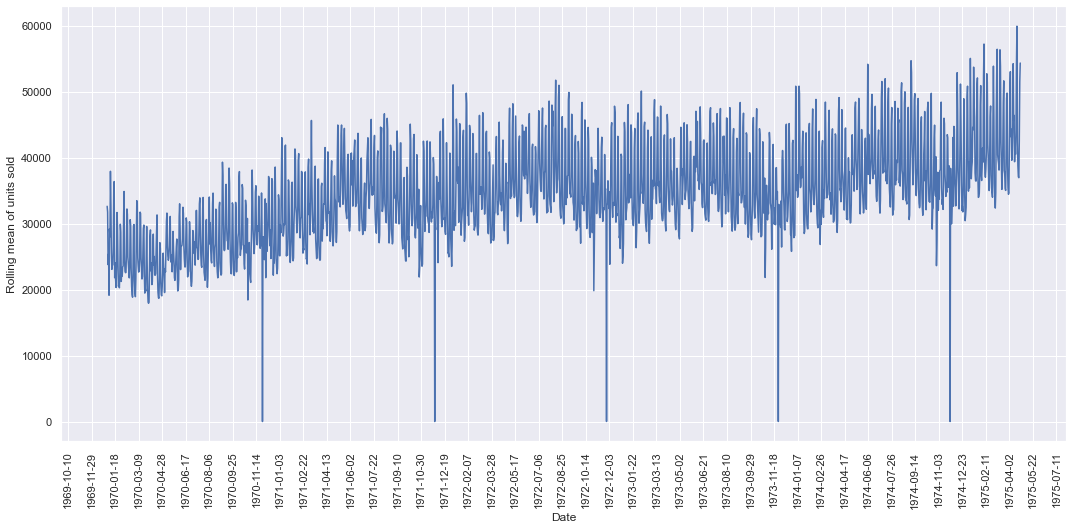

In [120]:
import matplotlib.dates as mdates
# figure = plt.figure(figsize=(18,8))
# plt.plot(total_daily_sales_date.index, total_daily_sales_date.iloc[:,1])
# plt.xlabel('Day number')
# plt.ylabel('Rolling mean of units sold')

figure = plt.figure(figsize=(18,8))
ax = plt.subplot(1,1,1)
plt.plot(total_daily_sales_date.index, total_daily_sales_date.iloc[:,0])
ax.xaxis.set_major_locator(mdates.DayLocator(interval=50))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=90)
plt.xlabel('Date')
plt.ylabel('Rolling mean of units sold')

Text(0, 0.5, 'Rolling mean of units sold')

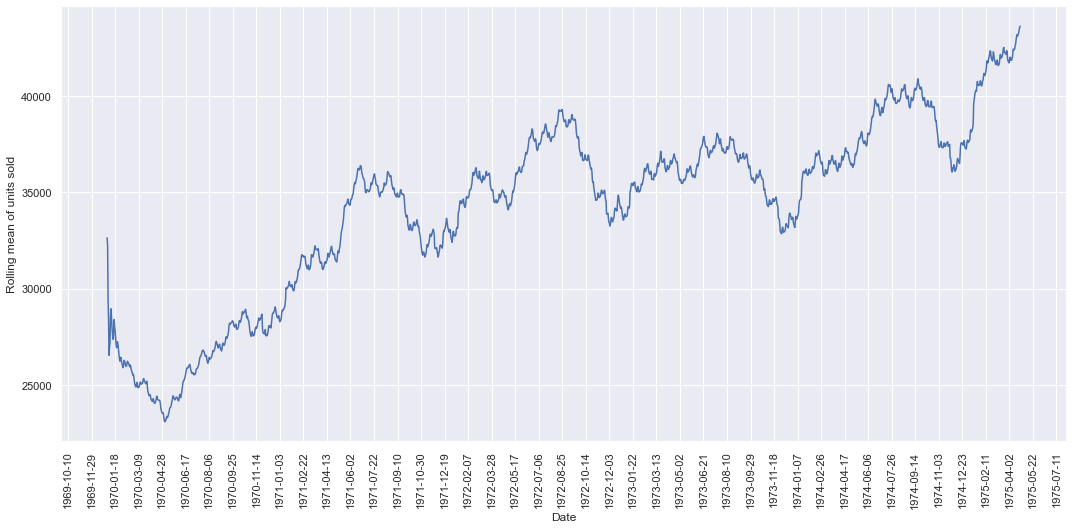

In [121]:
figure = plt.figure(figsize=(18,8))
ax = plt.subplot(1,1,1)
plt.plot(total_daily_sales_date.index, total_daily_sales_date.iloc[:,1])
ax.xaxis.set_major_locator(mdates.DayLocator(interval=50))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=90)
plt.xlabel('Date')
plt.ylabel('Rolling mean of units sold')

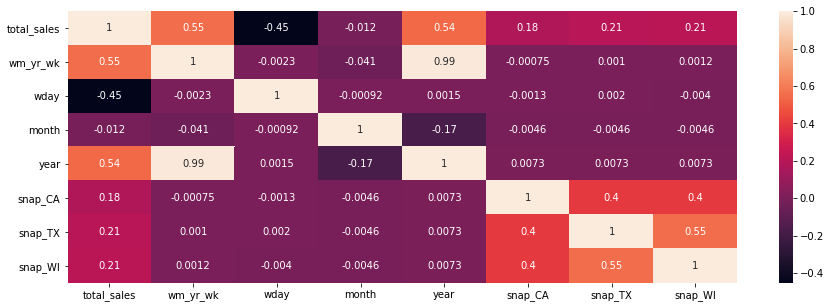

In [33]:
plt.figure(figsize=(15,5))
sns.heatmap(sales.corr(),annot=True,);

In [41]:
# avg daily units sold per day of the week
sales['day_number'] = sales['d'].apply(lambda x: int(x[2:]))
avg_weekday_sales_days = sales[['weekday', 'day_number', 'total_sales']] \
                            .groupby('weekday') \
                            .apply(lambda x: x['total_sales'].sum() / x['day_number'].nunique()).reset_index()


# rename columns
avg_weekday_sales_days.columns = ['weekday', 'avg_units_sold']

avg_weekday_sales_days


,weekday,avg_units_sold
0,Friday,34357.472924
1,Monday,32994.931408
2,Saturday,41706.269784
3,Sunday,41304.050360
4,Thursday,30321.039711
5,Tuesday,30500.483755
6,Wednesday,30130.418773


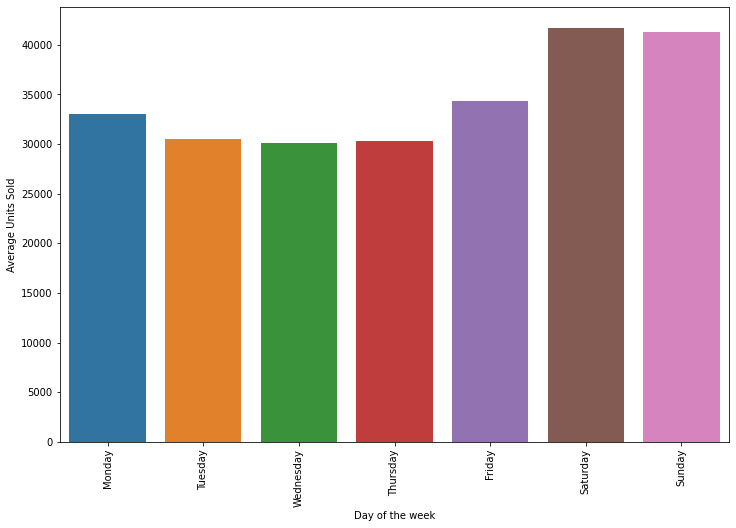

In [42]:
figure = plt.figure(figsize=(12,8))
ax = sns.barplot(x="weekday", y="avg_units_sold", data=avg_weekday_sales_days, 
                 order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
ax.set(xlabel="Day of the week", ylabel = "Average Units Sold")
for item in ax.get_xticklabels():
    item.set_rotation(90)

In [97]:
# avg daily units sold per day of the week
avg_monthly_sales = sales[['month', 'day_number', 'total_sales']] \
                            .groupby('month') \
                            .apply(lambda x: x['total_sales'].sum() / x['day_number'].nunique()).reset_index()


# rename columns
avg_monthly_sales.columns = ['month', 'avg_units_sold']

avg_monthly_sales

,month,avg_units_sold
0,1,33832.348101
1,2,34644.641176
2,3,34339.838710
3,4,34432.183333
4,5,34085.192090
5,6,35001.413333
6,7,35122.419355
7,8,35946.645161
8,9,35479.260000
9,10,34713.477419


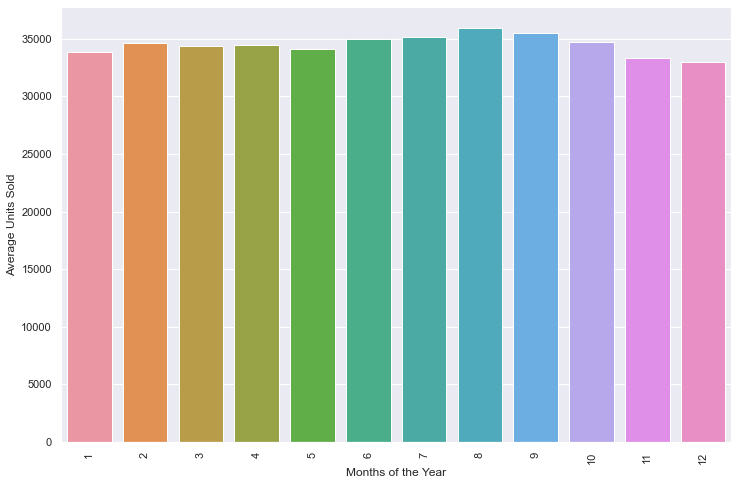

In [98]:
figure = plt.figure(figsize=(12,8))
ax = sns.barplot(x="month", y="avg_units_sold", data=avg_monthly_sales)
ax.set(xlabel="Months of the Year", ylabel = "Average Units Sold")
for item in ax.get_xticklabels():
    item.set_rotation(90)

In [99]:
# avg daily units sold per day of the week
avg_monthly_sales = sales[['year', 'day_number', 'total_sales']] \
                            .groupby('year') \
                            .apply(lambda x: x['total_sales'].sum() / x['day_number'].nunique()).reset_index()


# rename columns
avg_monthly_sales.columns = ['year', 'avg_units_sold']

avg_monthly_sales

,year,avg_units_sold
0,2011,26280.667656
1,2012,32955.838798
2,2013,35988.364384
3,2014,35862.400000
4,2015,37810.441096
5,2016,41835.041958


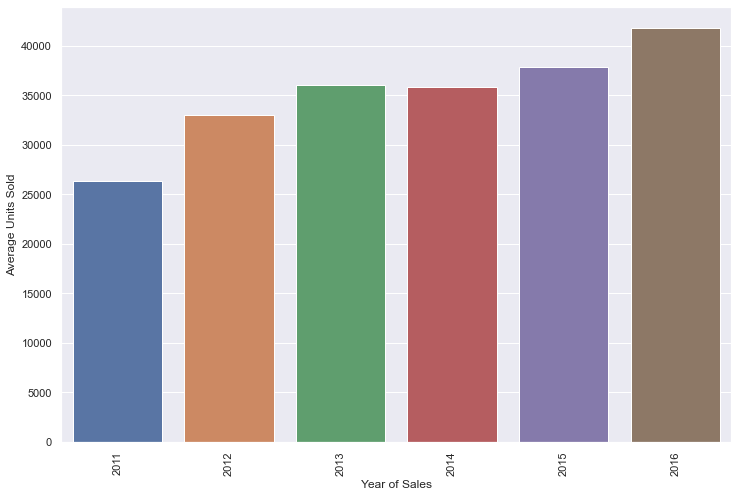

In [100]:
figure = plt.figure(figsize=(12,8))
ax = sns.barplot(x="year", y="avg_units_sold", data=avg_monthly_sales)
ax.set(xlabel="Year of Sales", ylabel = "Average Units Sold")
for item in ax.get_xticklabels():
    item.set_rotation(90)

In [52]:
print("Event days in 2012")
sales[(sales.year == 2012) & ((sales.event_name_1.notnull()) | (sales.event_name_2.notnull()))]

Event days in 2012


,total_sales,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,day_number
date,,,,,,,,,,,,,,,
2012-01-01,21807.0,11149,Sunday,2,1,2012,d_338,NewYear,National,NaN,NaN,1,1,0,338
2012-01-07,37143.0,11150,Saturday,1,1,2012,d_344,OrthodoxChristmas,Religious,NaN,NaN,1,1,0,344
2012-01-16,30548.0,11151,Monday,3,1,2012,d_353,MartinLutherKingDay,National,NaN,NaN,0,0,0,353
2012-02-05,40075.0,11202,Sunday,2,2,2012,d_373,SuperBowl,Sporting,NaN,NaN,1,1,1,373
2012-02-14,25100.0,11203,Tuesday,4,2,2012,d_382,ValentinesDay,Cultural,NaN,NaN,0,0,1,382
2012-02-20,30218.0,11204,Monday,3,2,2012,d_388,PresidentsDay,National,NaN,NaN,0,0,0,388
2012-02-22,24115.0,11204,Wednesday,5,2,2012,d_390,LentStart,Religious,NaN,NaN,0,0,0,390
2012-02-29,24802.0,11205,Wednesday,5,2,2012,d_397,LentWeek2,Religious,NaN,NaN,0,0,0,397
2012-03-08,29759.0,11206,Thursday,6,3,2012,d_405,Purim End,Religious,NaN,NaN,1,0,1,405


In [162]:
avg_snapTX_sales_days = sales[['snap_TX', 'day_number', 'total_sales']].groupby('snap_TX').apply(lambda x: x['total_sales'].sum() / x['day_number'].nunique()).reset_index()
avg_snapTX_sales_days.columns = ['snap', 'avg_units_sold']
#avg_snapTX_sales_days['snap'] = avg_snapTX_sales_days['snap'] \
#   
avg_snapTX_sales_days

,snap,avg_units_sold
0,0,33388.863182
1,1,36700.409375


In [149]:
avg_snapCA_sales_days = sales[['snap_CA', 'day_number', 'total_sales']] \
                            .groupby('snap_CA') \
                            .apply(lambda x: x['total_sales'].sum() / x['day_number'].nunique()).reset_index()
avg_snapCA_sales_days.columns = ['snap', 'avg_units_sold']
avg_snapCA_sales_days

,snap,avg_units_sold
0,0,33546.929285
1,1,36379.090625


In [193]:
avg_snapWI_sales_days = sales[['snap_WI', 'day_number', 'total_sales']] \
                            .groupby('snap_WI') \
                            .apply(lambda x: x['total_sales'].sum() / x['day_number'].nunique()).reset_index()
avg_snapWI_sales_days.columns = ['snap', 'avg_units_sold']
avg_snapWI_sales_days

,snap,avg_units_sold
0,0,33372.247502
1,1,36734.185937


Text(0.5, 1.0, 'Bar-Graph showing mean sales According to snap_CA')

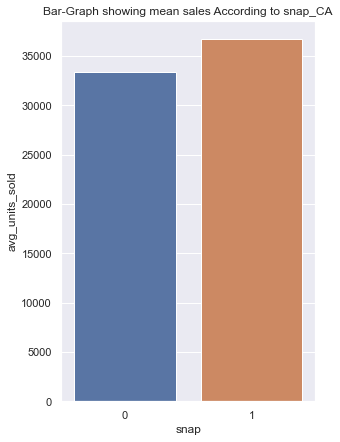

In [200]:
plt.figure(figsize=(10,7))
plt.subplot(121)
sns.barplot(x='snap',y='avg_units_sold',data=avg_snapWI_sales_days)
plt.title("Bar-Graph showing mean sales According to snap_CA")

In [178]:
avg_snapTX_sales_days = sales[['snap_TX', 'day_number', 'total_sales']].groupby('snap_TX').apply(lambda x: x['total_sales'].sum() / x['day_number'].nunique()).reset_index()
avg_snapTX_sales_days.columns = ['snap', 'avg_units_sold']
#avg_snapTX_sales_days['snap'] = avg_snapTX_sales_days['snap'] \
#                            .apply(lambda x: 'snap_TX_no' if x==0 else 'snap_TX_yes')

avg_snapCA_sales_days = sales[['snap_CA', 'day_number', 'total_sales']] \
                            .groupby('snap_CA') \
                            .apply(lambda x: x['total_sales'].sum() / x['day_number'].nunique()).reset_index()
avg_snapCA_sales_days.columns = ['snap', 'avg_units_sold']
#avg_snapCA_sales_days['snap'] = avg_snapCA_sales_days['snap'] \
#                            .apply(lambda x: 'snap_CA_no' if x==0 else 'snap_CA_yes')

avg_snapWI_sales_days = sales[['snap_WI', 'day_number', 'total_sales']] \
                            .groupby('snap_WI') \
                            .apply(lambda x: x['total_sales'].sum() / x['day_number'].nunique()).reset_index()
avg_snapWI_sales_days.columns = ['snap', 'avg_units_sold']
#avg_snapWI_sales_days['snap'] = avg_snapWI_sales_days['snap'] \
#                            .apply(lambda x: 'snap_WI_no' if x==0 else 'snap_WI_yes')


merge1 = pd.concat([avg_snapTX_sales_days, avg_snapCA_sales_days])
merge2 = pd.concat([merge1, avg_snapWI_sales_days])
merge2



,snap,avg_units_sold
0,0,33388.863182
1,1,36700.409375
0,0,33546.929285
1,1,36379.090625
0,0,33372.247502
1,1,36734.185937


In [222]:
sales.event_type_1.unique()

array([nan, 'Sporting', 'Cultural', 'National', 'Religious'], dtype=object)

ValueError: 'explode' must be of length 'x'

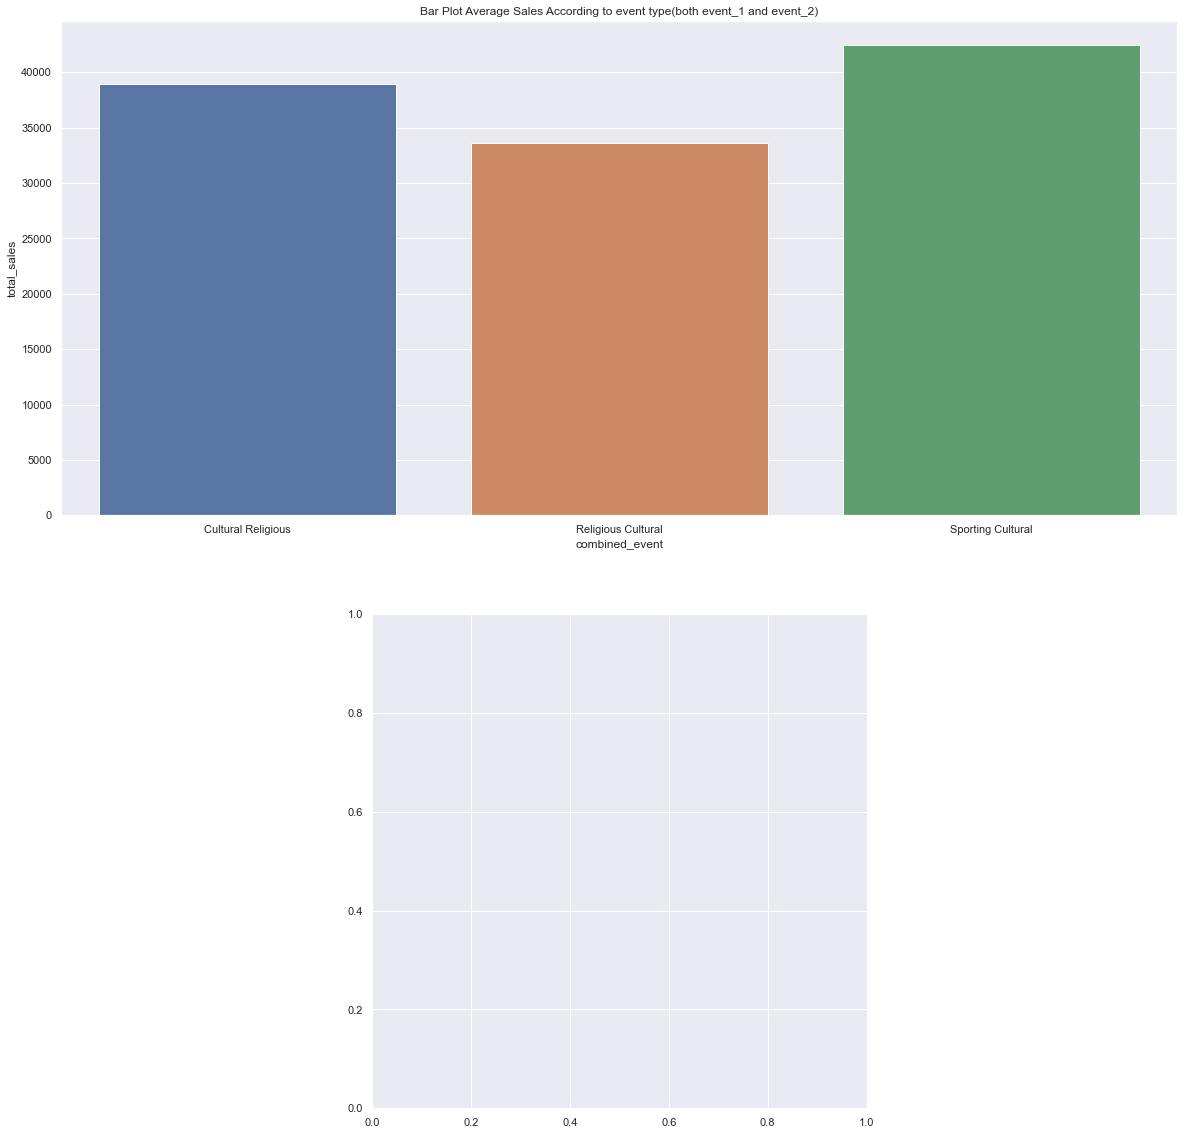

In [218]:
df=sales.groupby(['event_type_1','event_type_2']).mean()
df.reset_index(level=[0,1],inplace=True)
df['combined_event']=df['event_type_1']+" "+df['event_type_2']
plt.figure(figsize=(20,20))
plt.subplot(211)
sns.barplot(x='combined_event',y='total_sales',data=df)
plt.title("Bar Plot Average Sales According to event type(both event_1 and event_2)")
df=sales.groupby(['event_type_1','event_type_2']).sum()
df.reset_index(level=[0,1],inplace=True)
df['combined_event']=df['event_type_1']+" "+df['event_type_2']
plt.subplot(212)
df['sales_total']=df['total_sales']/sum(df['total_sales'].values)*100
explode = (0.1, 0.2, 0.3, 0.4,0.5,0.6,0.7,0.8)
plt.pie(df['sales_total'].values,labels=df['combined_event'].values,shadow=True,autopct='%1.1f%%',explode=explode)
plt.title("Pie Chart for total Sales According to event type(both event_1 and event_2)")
plt.show()

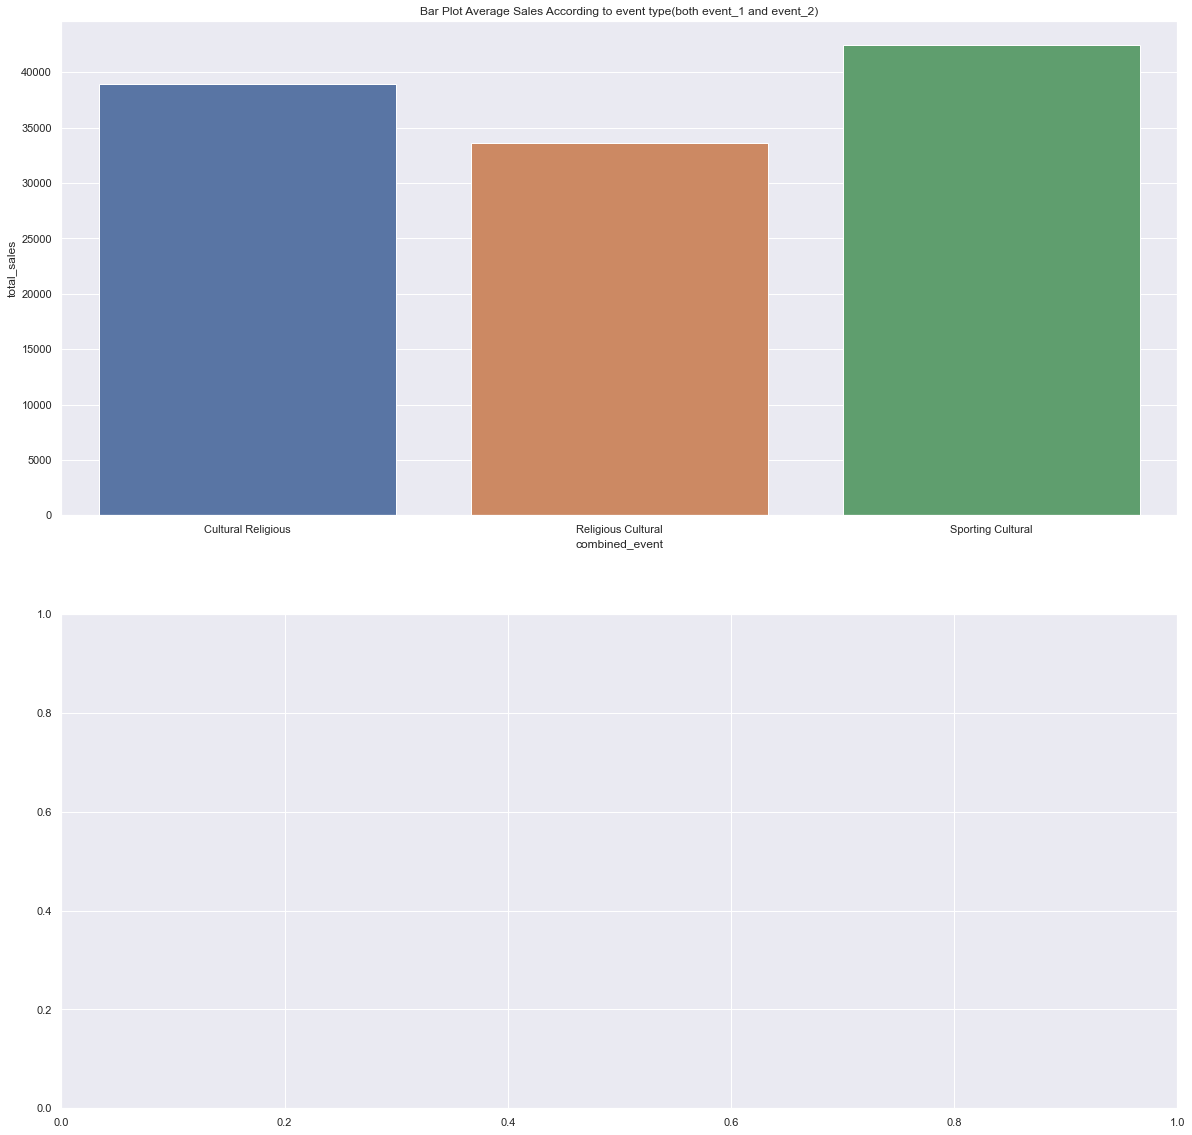

In [219]:
df=sales.groupby(['event_type_1','event_type_2']).mean()
df.reset_index(level=[0,1],inplace=True)
df['combined_event']=df['event_type_1']+" "+df['event_type_2']
plt.figure(figsize=(20,20))
plt.subplot(211)
sns.barplot(x='combined_event',y='total_sales',data=df)
plt.title("Bar Plot Average Sales According to event type(both event_1 and event_2)")
df=sales.groupby(['event_type_1','event_type_2']).sum()
df.reset_index(level=[0,1],inplace=True)
df['combined_event']=df['event_type_1']+" "+df['event_type_2']
plt.subplot(212)
df['sales_total']=df['total_sales']/sum(df['total_sales'].values)*100
explode = (0.1, 0.2, 0.3, 0.4,0.5,0.6,0.7,0.8)
#plt.pie(df['sales_total'].values,labels=df['combined_event'].values,shadow=True,autopct='%1.1f%%',explode=explode)
#plt.title("Pie Chart for total Sales According to event type(both event_1 and event_2)")
#plt.show()

ValueError: Could not interpret input 'combined_event'

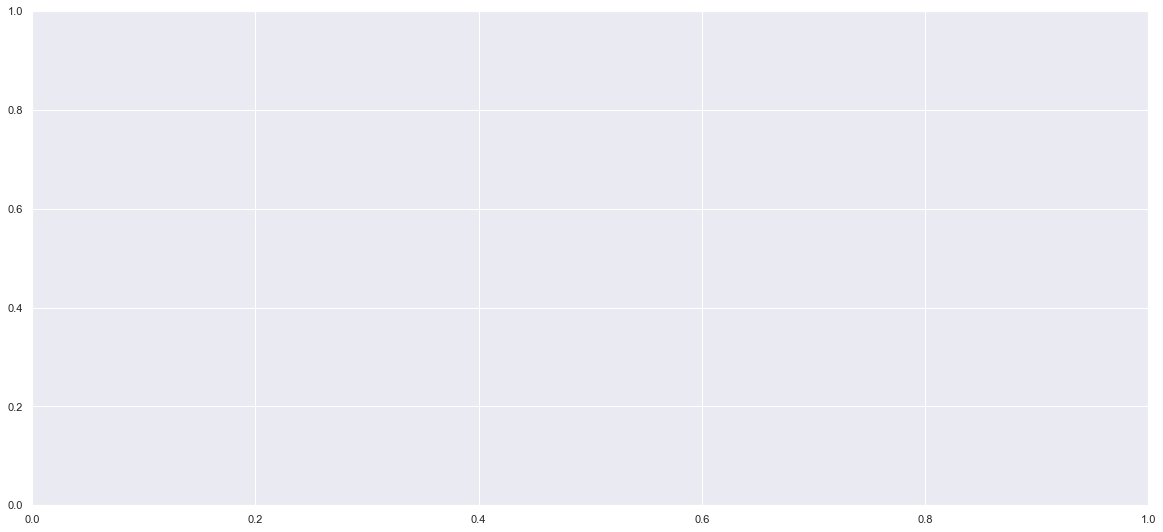

In [145]:
val= merge2[]
val

IndexError: single positional indexer is out-of-bounds

In [139]:

merge2 = merge2.iloc[::2, :]
merge2
val

KeyError: (0, 1)

In [134]:
col_no = merge2["snap_TX_no","snap_CA_no","snap_WI_no"]
merge2['snap_no'] = col_no.mean(axis=1)
#merge2.iloc[0,1]
merge2

KeyError: ('snap_TX_no', 'snap_CA_no', 'snap_WI_no')

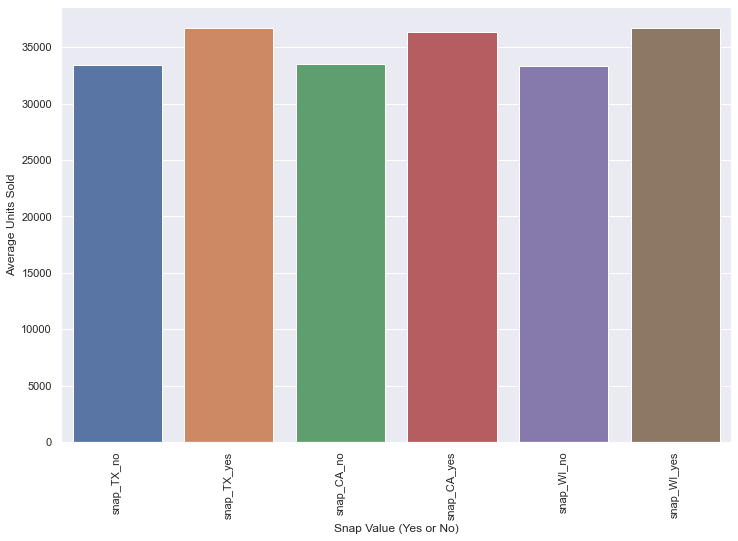

In [79]:
figure = plt.figure(figsize=(12,8))
ax = sns.barplot(x="snap", y="avg_units_sold", data=merge2)
ax.set(xlabel="Snap Value (Yes or No)", ylabel = "Average Units Sold")
for item in ax.get_xticklabels():
    item.set_rotation(90)

In [34]:
figure = plt.figure(figsize=(12,8))
ax = sns.barplot(x="weekday", y="avg_units_sold", data=avg_weekday_sales_days, 
                 order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
ax.set(xlabel="Day of the week", ylabel = "Average Units Sold")
for item in ax.get_xticklabels():
    item.set_rotation(90)

NameError: name 'avg_weekday_sales_days' is not defined

<Figure size 864x576 with 0 Axes>

NameError: name 'event_name_1_se' is not defined

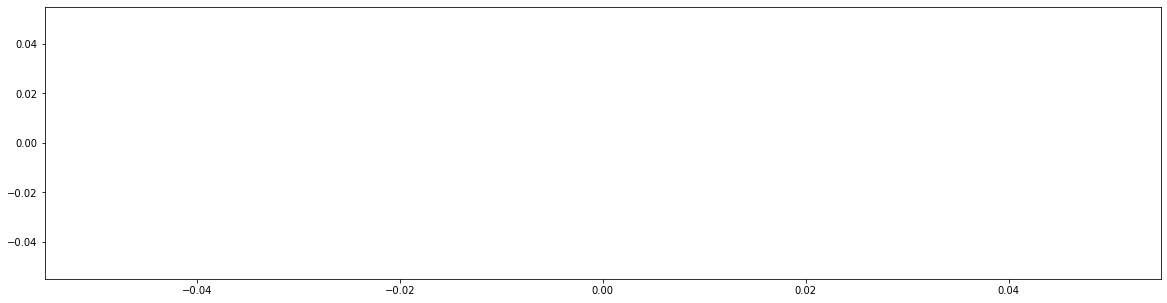

In [14]:
for i in range(5,10):
    fig =plt.figure(figsize= (20, 5))
    ax = fig.add_subplot(1, 1, 1)
    #ax.bar(x = range(len(transfer_cal.loc['snap_WI'][1500:1800].values)),height = transfer_cal.loc['snap_TX'][1500:1800].values,label='snap_TX',facecolor='red')
    ax.plot(sales.iloc[i, 500:800].values,label='sales')
    ax.bar(x = range(300),height = event_name_1_se[500:800].values*0.05*time_series_data.iloc[i, 500:800].values.max(),label='type_1',facecolor='black',width=1.2)
    ax.bar(x = range(300),height = event_name_2_se[500:800].values*0.05*time_series_data.iloc[i, 500:800].values.max(),label='type_2',facecolor='orange',width=1.2)
    plt.legend(['sale','event_1','event_2'])
    ax.set_title(str(i))

    ax.set_xlabel('Time')
    ax.set_ylabel('Sales')